# ***Predictive Quality in Additive Manufacturing***

Week 1: Data exploration
 Which structure has the production system? Are all features present for all products?
 Which product clusters can be identified based on the existence of features? Do features
 correlate? Are there outliers in the features?

## Data import and visualization

All necessary packages 

In [3]:
%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install openpyxl
import matplotlib.patches as mpatches

zsh:1: command not found: pip


In [5]:
# change data_path according to the path of data
current_path = os.getcwd()
print("current pth:", current_path)
#data_path = os.path.dirname(current_path)
if os.path.exists("02_Data"):
    data_path = ("02_Data")
    print("Data has been founded at:", data_path)
else:
    print("Can`t find Data")
Audio_path = os.path.join(data_path,"01_Audio")
#print("Audio:", Audio_path)
Audio_files = [ f for f in os.listdir(Audio_path) if f.endswith(".csv")]
print("Audio_files are: ", Audio_files)
list_Audio = []
id_Audio = []
for file_name in Audio_files:
    file_path = os.path.join(Audio_path,file_name)
    #get data
    df = pd.read_csv(file_path)
    list_Audio.append(df)
    #get data id
    id_Audio.append(int(os.path.splitext(os.path.basename(file_path))[0]))

print("Audio_len: ",len(list_Audio))
print("shape of list_Audio:", list_Audio[0].shape) 


Weldqas_path = os.path.join(data_path,"02_Weldqas")
Weldqas_files = [ j for j in os.listdir(Weldqas_path) if j.endswith(".csv")]
print("Weldqas_files are: ", Weldqas_files)
list_Weldqas = []
for file_name in Weldqas_files:
    file_path = os.path.join(Weldqas_path,file_name)
    df = pd.read_csv(file_path)
    list_Weldqas.append(df)
print("Weldqas_len: ",len(list_Weldqas))
print("shape of list_Weldqas:", list_Weldqas[0].shape) 
##get the path o excel
excel_paths = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".xlsx"):
            excel_paths.append(os.path.join(data_path,file))
print(excel_paths)

current pth: /Users/macbook/Desktop/TUM/kecheng/KIGp
Data has been founded at: 02_Data
Audio_files are:  ['223.csv', '237.csv', '169.csv', '196.csv', '182.csv', '357.csv', '343.csv', '425.csv', '419.csv', '394.csv', '380.csv', '381.csv', '395.csv', '418.csv', '342.csv', '424.csv', '356.csv', '183.csv', '197.csv', '236.csv', '222.csv', '234.csv', '220.csv', '208.csv', '181.csv', '195.csv', '426.csv', '340.csv', '354.csv', '368.csv', '383.csv', '397.csv', '396.csv', '382.csv', '369.csv', '355.csv', '427.csv', '341.csv', '194.csv', '180.csv', '209.csv', '221.csv', '235.csv', '219.csv', '231.csv', '225.csv', '184.csv', '190.csv', '379.csv', '345.csv', '423.csv', '351.csv', '386.csv', '392.csv', '393.csv', '387.csv', '350.csv', '344.csv', '422.csv', '378.csv', '191.csv', '185.csv', '224.csv', '230.csv', '218.csv', '226.csv', '232.csv', '178.csv', '193.csv', '187.csv', '408.csv', '352.csv', '420.csv', '346.csv', '391.csv', '385.csv', '384.csv', '390.csv', '421.csv', '347.csv', '353.csv', '40

# Read Excel

In [6]:
#get the header of table
excel_df = pd.read_excel(excel_paths[0], sheet_name=0,skiprows=10)
print(excel_df.columns)
df_Usage = excel_df[["Number of Measurement",'Dataset']]
print(df_Usage)
print(id_Audio)


Index(['Unnamed: 0', 'Number of Measurement', 'Experiment', 'Process',
       'Usable', 'Dataset', 'Audio', 'Currency I [A]', 'Time [ms]',
       'Eintauchmaß p [mm]', 'Hub h [mm]', 'Forced Error Type',
       'Coaxial Offset [mm]', 'Tilt [°]', 'Notes'],
      dtype='object')
     Number of Measurement Dataset
0                      169      iO
1                      170      iO
2                      171      iO
3                      172      iO
4                      173      iO
..                     ...     ...
255                    424     niO
256                    425     niO
257                    426     niO
258                    427     niO
259                    428     niO

[260 rows x 2 columns]
[223, 237, 169, 196, 182, 357, 343, 425, 419, 394, 380, 381, 395, 418, 342, 424, 356, 183, 197, 236, 222, 234, 220, 208, 181, 195, 426, 340, 354, 368, 383, 397, 396, 382, 369, 355, 427, 341, 194, 180, 209, 221, 235, 219, 231, 225, 184, 190, 379, 345, 423, 351, 386, 392, 393, 387

# Audio part

         Unnamed: 0       Time    M
0                 0   0.000000   28
1                 1   0.000021   26
2                 2   0.000042   23
3                 3   0.000063   27
4                 4   0.000083   22
...             ...        ...  ...
1021947     1021947  21.290563  216
1021948     1021948  21.290583  227
1021949     1021949  21.290604  242
1021950     1021950  21.290625  249
1021951     1021951  21.290646  263

[1021952 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021952 entries, 0 to 1021951
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1021952 non-null  int64  
 1   Time        1021952 non-null  float64
 2   M           1021952 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 23.4 MB


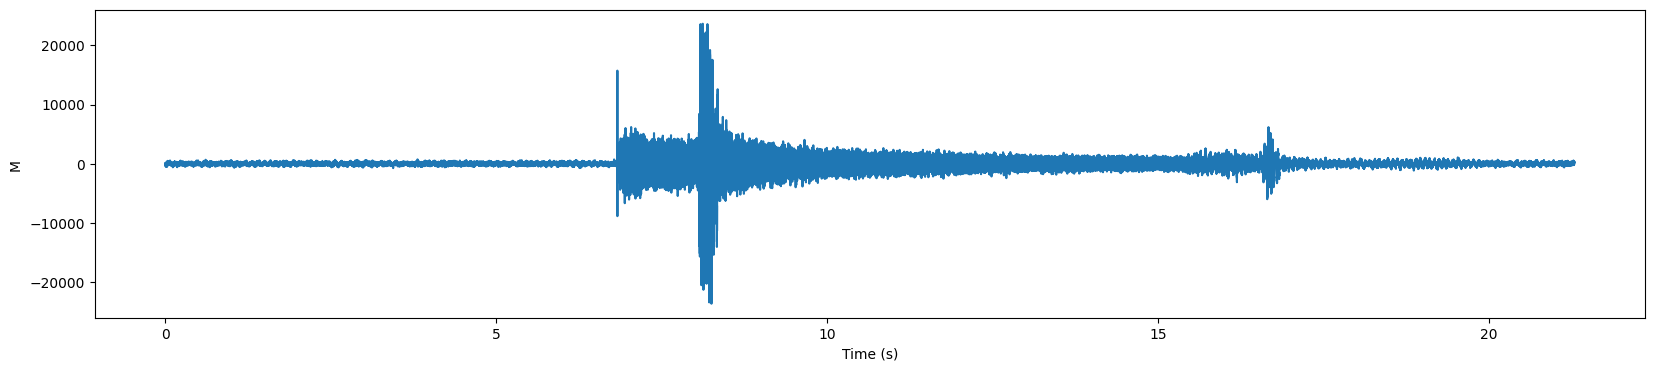

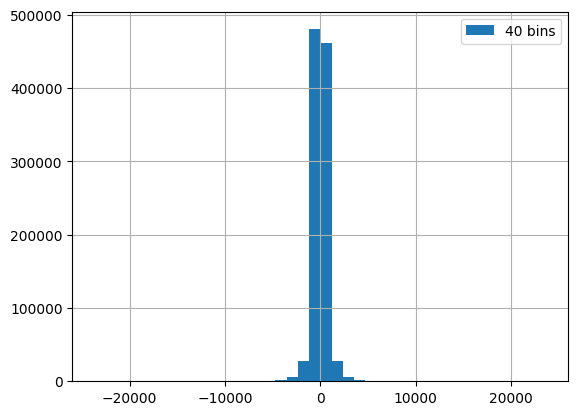

In [6]:
# read single file
file_path = os.path.join(Audio_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
plt.figure(figsize=(20, 4))
print(df)
df.info()
x = df["Time"]
y = df["M"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("M ")
plt.show()

df["M"].hist(bins = 40, label= '40 bins')
plt.legend()
plt.show()



### MFCC
MFCC (Mel-Frequency Cepstral Coefficients) is one of the most commonly used features in audio signal processing, especially in speech recognition, speaker identification, and emotion analysis. It mimics the human ear’s perception of sound frequencies and extracts key spectral characteristics from the audio.
The computation steps include:
1.  Framing and windowing
2.  Fast Fourier Transform (FFT)
3.  Applying Mel filter banks
4.  Taking logarithm of filter energies

In [7]:
%pip install librosa
import librosa
import librosa.display
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Estimated sampling rate (sr): 48000 Hz


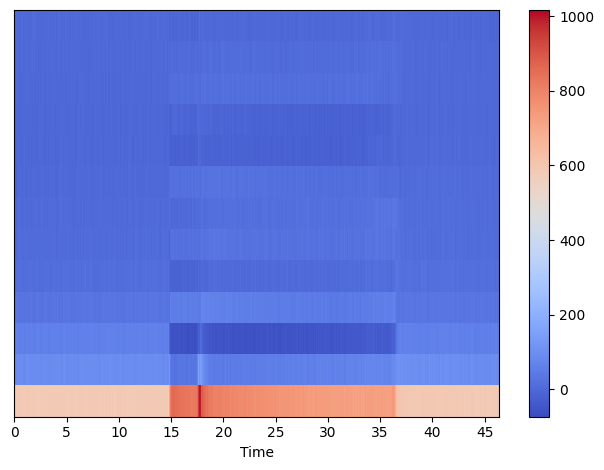

[[ 5.7365265e+02  5.8765656e+02  5.9133368e+02 ...  5.8647357e+02
   5.8716431e+02  5.8231982e+02]
 [ 7.8476257e+01  9.4175354e+01  9.8066170e+01 ...  8.9629509e+01
   9.0327286e+01  8.5128571e+01]
 [ 5.6366188e+01  6.3362083e+01  6.4833450e+01 ...  5.6667496e+01
   5.6610619e+01  5.3542038e+01]
 ...
 [ 1.9949934e+00 -3.6784949e+00 -6.9327059e+00 ...  2.8189120e+00
   2.7418284e+00 -1.8927001e+00]
 [-1.8971276e+00 -5.6749849e+00 -6.2844582e+00 ...  3.9611819e+00
   8.0100136e+00  1.6168004e-01]
 [-4.0007420e+00 -4.7315817e+00 -3.7990403e+00 ...  1.8818406e+00
   7.2184830e+00  1.8535128e+00]]
1997


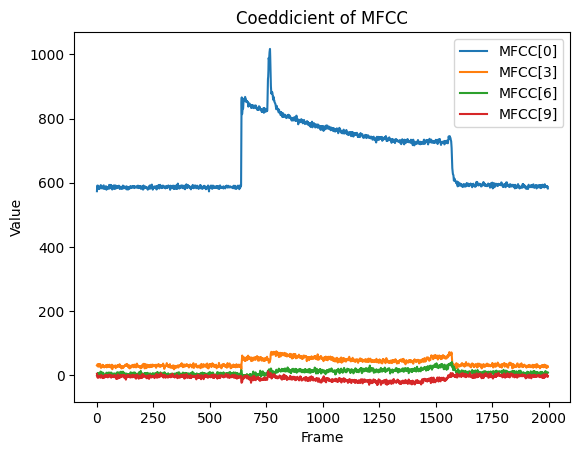

In [8]:
# to schieve MFCC
# Estimated sampling rate based on test data
delta_t = df["Time"].iloc[1] - df["Time"].iloc[0]
sr = round(1 / delta_t)
print(f"Estimated sampling rate (sr): {sr} Hz")
# Compute MFCC with 13 coefficients 
n_mfcc=13
# librosa only accept numpy type data
mfccs = librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=n_mfcc)

librosa.display.specshow(mfccs, x_axis='time')
# Add a color bar on the right to indicate MFCC magnitude
plt.colorbar()
plt.tight_layout()
plt.show()
print(mfccs)
print(len(mfccs[0]))
for i in range(0, 12, 3):
    
    y = mfccs [i]
    plt.plot(y, label=f"MFCC[{i}]")
plt.xlabel("Frame")
plt.ylabel("Value")
plt.title("Coeddicient of MFCC")
plt.legend()
plt.show()

MFCC[0]：   Represents the log total energy of the signal.

MFCC[3]：   Describe the general shape of the spectral envelope (like tilt).

MFCC[6]：   Reflect mid-frequency variations.

MFCC[9]：   Capture high-frequency modulations.

In [9]:
#compute MFCCp[0] part duration which over threhold
def get_mfcc0_duration_over_threshold(mfccs, threshold, sr, hop_length=512):
     mfcc_0 = mfccs[0]
     above_threshold = mfcc_0 > threshold
     num_frames = above_threshold.sum()
     frame_duration = hop_length / sr

     return num_frames * frame_duration

duration = get_mfcc0_duration_over_threshold(mfccs, 700, sr=sr)
print(f"MFCC[0] > 700 duration time：{duration:.3f} s")

MFCC[0] > 700 duration time：9.941 s


### FFT

Estimated sampling rate (sr): 48000 Hz


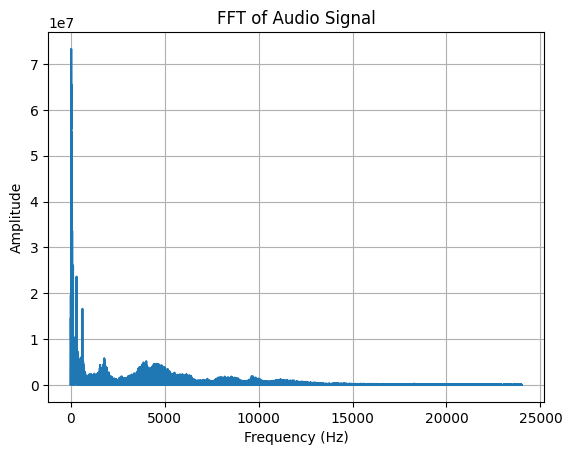

[0.00000000e+00 4.69689379e-02 9.39378758e-02 ... 2.39998591e+04
 2.39999061e+04 2.39999530e+04] 450211.4457939161 73283746.93857527


In [10]:
# FFT
# Perform the Fast Fourier Transform (FFT) on the audio signal in column "M"
Y = np.fft.fft(df["M"])
# Compute the frequency bins corresponding to the FFT result
# Estimated sampling rate based on test data
delta_t = df["Time"].iloc[1] - df["Time"].iloc[0]
sr = round(1 / delta_t)
print(f"Estimated sampling rate (sr): {sr} Hz")
frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
# Plot the magnitude spectrum (only the positive half of frequencies and amplitudes)
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Audio Signal")
plt.grid(True)
plt.show()

peak_freq = frequencies[:len(frequencies)//2]
mean_amp = np.mean(np.abs(Y[:len(Y)//2]))
max_amp = np.max(np.abs(Y[:len(Y)//2]))

print(peak_freq, mean_amp, max_amp)


        Unnamed: 0       Time    M
0                0   0.000000  226
1                1   0.000021  249
2                2   0.000042  267
3                3   0.000063  283
4                4   0.000083  302
...            ...        ...  ...
791547      791547  16.490562 -453
791548      791548  16.490583 -457
791549      791549  16.490604 -471
791550      791550  16.490625 -476
791551      791551  16.490646 -474

[791552 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791552 entries, 0 to 791551
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  791552 non-null  int64  
 1   Time        791552 non-null  float64
 2   M           791552 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 18.1 MB


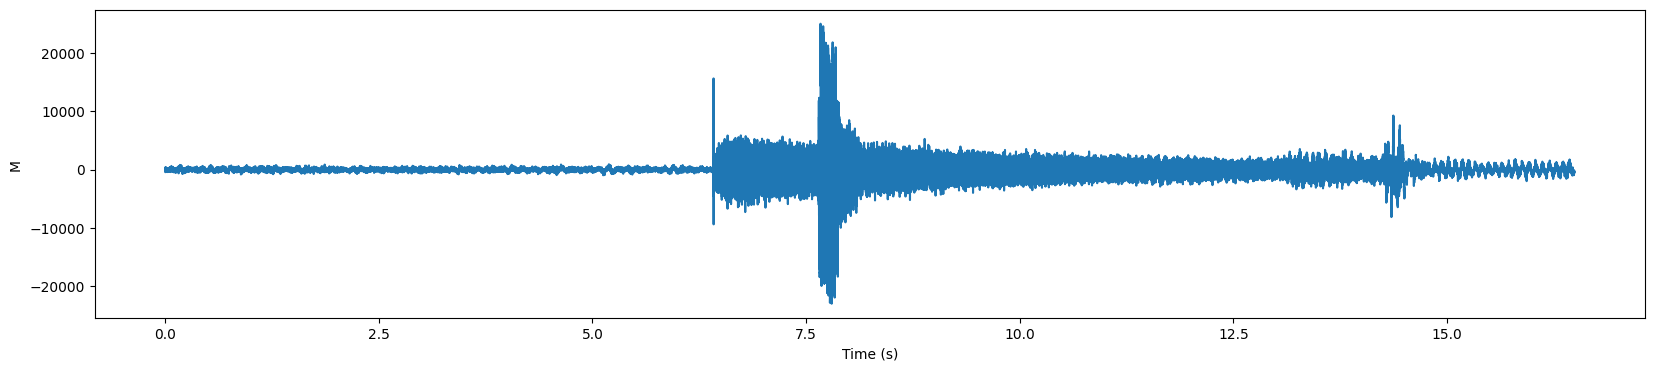

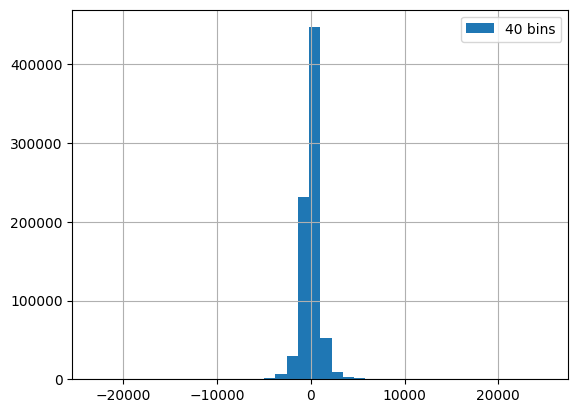

In [11]:
# read single failde file
file_path = os.path.join(Audio_path,"250.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')
plt.figure(figsize=(20, 4))
print(df)
df.info()
x = df["Time"]
y = df["M"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("M ")
plt.show()
df["M"].hist(bins = 40, label= '40 bins')
plt.legend()
plt.show()

Estimated sampling rate (sr): 48000 Hz


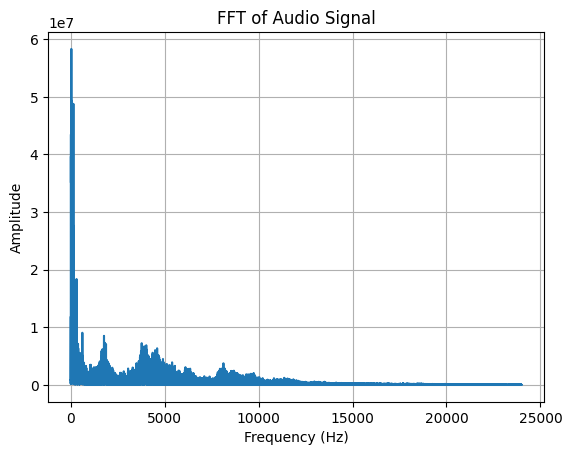

[0.00000000e+00 6.06403622e-02 1.21280724e-01 ... 2.39998181e+04
 2.39998787e+04 2.39999394e+04] 567967.4516294294 58320200.070575856


In [12]:
# FFT
# Perform the Fast Fourier Transform (FFT) on the audio signal in column "M"
Y = np.fft.fft(df["M"])
# Compute the frequency bins corresponding to the FFT result
# Estimated sampling rate based on test data
delta_t = df["Time"].iloc[1] - df["Time"].iloc[0]
sr = round(1 / delta_t)
print(f"Estimated sampling rate (sr): {sr} Hz")
frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
# Plot the magnitude spectrum (only the positive half of frequencies and amplitudes)
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Audio Signal")
plt.grid(True)
plt.show()

peak_freq = frequencies[:len(frequencies)//2]
mean_amp = np.mean(np.abs(Y[:len(Y)//2]))
max_amp = np.max(np.abs(Y[:len(Y)//2]))

print(peak_freq, mean_amp, max_amp)

### Mean

In [13]:
#get mean of Audio based on M
mean_list = [df["M"].values.mean() for df in list_Audio]
mean_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "Mean of Audio": mean_list
})
#merge mean with Dataset of excel
Audio_mean_df = mean_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_mean_df.head())

colors = Audio_mean_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_mean_df['Number of Measurement'],Audio_mean_df['Mean of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("Mean of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()



NameError: name 'df_Usage' is not defined

### Std

In [14]:
#get std of Audio based on M
std_list = [df["M"].values.std() for df in list_Audio]
std_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "Std of Audio": std_list
})
#merge std with Dataset of excel
Audio_std_df = std_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_std_df.head())

colors = Audio_std_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_std_df['Number of Measurement'],Audio_std_df['Std of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("Std of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()



NameError: name 'df_Usage' is not defined

In [19]:
excel_df = pd.read_excel(excel_paths[0], sheet_name=0,skiprows=10)
print(excel_df.columns)
df_Usage = excel_df[["Number of Measurement",'Dataset']]
Audio_df_without_label = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "DAta of Audio": list_Audio
})

label_map = dict(zip(df_Usage["Number of Measurement"], df_Usage["Dataset"]))

# conbine csv data with excel
audio_list_with_labels = []

for id_, audio in zip(id_Audio, list_Audio):
    label = label_map.get(id_, None)  
    audio_list_with_labels.append({
        "id": id_,
        "audio": audio,
        "label": label
    })


Index(['Unnamed: 0', 'Number of Measurement', 'Experiment', 'Process',
       'Usable', 'Dataset', 'Audio', 'Currency I [A]', 'Time [ms]',
       'Eintauchmaß p [mm]', 'Hub h [mm]', 'Forced Error Type',
       'Coaxial Offset [mm]', 'Tilt [°]', 'Notes'],
      dtype='object')


In [17]:
# read single file
#file_path = os.path.join(Audio_path,"169.csv")
#df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
def ReadSingleAudio(id_Audio):
    for sample in audio_list_with_labels:
        
        if sample['id'] == id_Audio:
                 
            df = pd.DataFrame({
                "Measurement": sample['audio']['M'],
                "Time":sample['audio']['Time'],
                
                })
            
            print(df)
            #df.info()
            x = df["Time"]
            y = df["Measurement"]
            plt.figure(figsize=(30, 4)) 
            plt.plot(x,y)

            plt.xlabel("Time (s)")
            plt.ylabel("Measurement ")
            plt.title(f" Audio ID : {id_Audio} | Label :{sample['label']}")
            plt.show()

In [18]:
ReadSingleAudio(376)

NameError: name 'ReadSingleAudio' is not defined

After that we can find a outlier around 315 (318)

In [20]:
std_values = std_df['Std of Audio'].values

mean = np.mean(std_values)
std = np.std(std_values)

threshold_upper = mean + 2 * std
threshold_lower = mean - 2 * std

outliers = std_df[(std_df['Std of Audio'] > threshold_upper) | (std_df['Std of Audio'] < threshold_lower)]
print(outliers)


     Number of Measurement  Std of Audio
113                    319   1312.554251
118                    318    257.260026
133                    376   2439.949335
169                    358   2329.723828
198                    170   1353.614509


original shap: (201, 2)
cleaned shap: (196, 2)


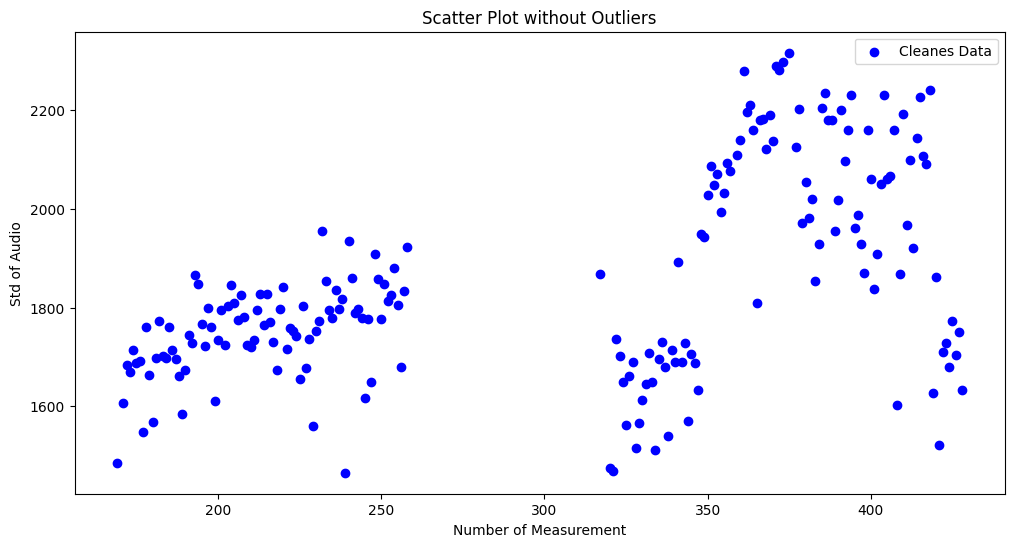

In [21]:
std_values = std_df['Std of Audio'].values
mean = np.mean(std_values)
std = np.std(std_values)

threshold_upper = mean + 2 * std
threshold_lower = mean - 2 * std

mask = (std_df['Std of Audio'] <= threshold_upper) & (std_df['Std of Audio'] >= threshold_lower)

clean_df = std_df[mask].copy()

print("original shap:", std_df.shape)
print("cleaned shap:", clean_df.shape)

plt.figure(figsize = (12, 6))
plt.scatter(clean_df['Number of Measurement'], clean_df['Std of Audio'], color = 'blue', label = 'Cleanes Data')
plt.xlabel("Number of Measurement")
plt.ylabel("Std of Audio")
plt.title("Scatter Plot without Outliers")
plt.legend()
plt.show()

High-pass fliter

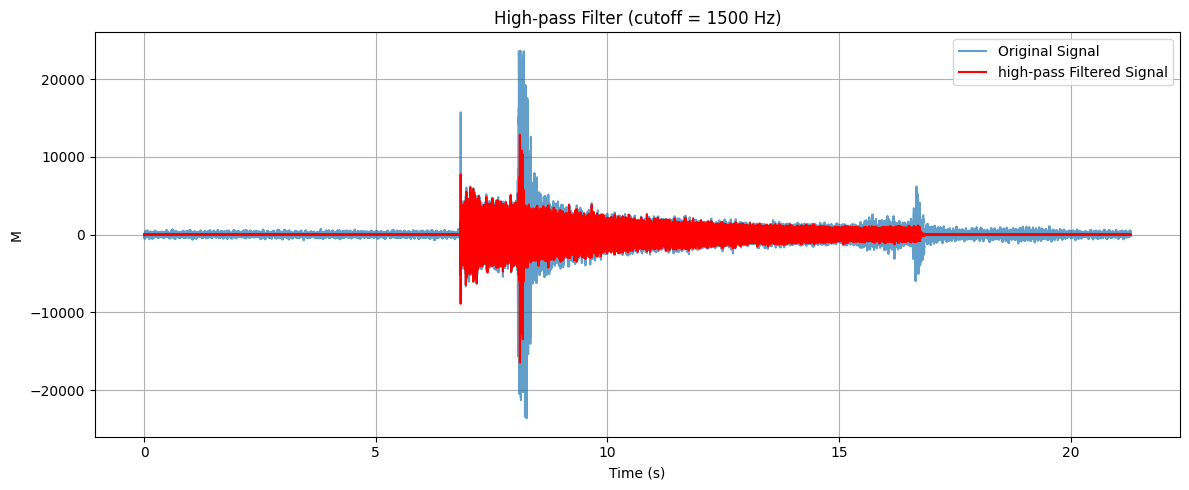

In [ ]:
from scipy.signal import butter, filtfilt

#Read the CSV file
file_path = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/01_Audio/169.csv"
df = pd.read_csv(file_path)

# Extracting the 'Time' and 'M' columns
t = df['Time']
m = df['M']

#define high-pass filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs              # Nyquist frequency
    normal_cutoff = cutoff / nyq                # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)             #filter coefficients
    return b, a

#define high-pass filter function
def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)             #get filter coefficients
    y = filtfilt(b, a, data)                #Apply zero-phase filtering to avoid phase distortion
    return y

#Calculate the sampling frequency from the time data
fs = 1 / (t[1] - t[0])              # Sampling frequency
cutoff = 1500               # Cutoff frequency in Hz

# Apply the high-pass filter to the signals
m_filtered = highpass_filter(m, cutoff, fs, order=3)

#Plot the original and filtered signals
plt.figure(figsize=(12, 5))
plt.plot(t, m, label='Original Signal', alpha=0.7)
plt.plot(t, m_filtered, label='high-pass Filtered Signal', color='red')
plt.xlabel('Time (s)')
plt.ylabel('M')
plt.title(f'High-pass Filter (cutoff = {cutoff} Hz)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Processing file: 223.csv
Processing file: 237.csv
Processing file: 169.csv
Processing file: 196.csv
Processing file: 182.csv
Processing file: 357.csv
Processing file: 343.csv
Processing file: 425.csv
Processing file: 419.csv
Processing file: 394.csv
Processing file: 380.csv
Processing file: 381.csv
Processing file: 395.csv
Processing file: 418.csv
Processing file: 342.csv
Processing file: 424.csv
Processing file: 356.csv
Processing file: 183.csv
Processing file: 197.csv
Processing file: 236.csv
Processing file: 222.csv
Processing file: 234.csv
Processing file: 220.csv
Processing file: 208.csv
Processing file: 181.csv
Processing file: 195.csv
Processing file: 426.csv
Processing file: 340.csv
Processing file: 354.csv
Processing file: 368.csv
Processing file: 383.csv
Processing file: 397.csv
Processing file: 396.csv
Processing file: 382.csv
Processing file: 369.csv
Processing file: 355.csv
Processing file: 427.csv
Processing file: 341.csv
Processing file: 194.csv
Processing file: 180.csv


/var/folders/rx/bfns8xbd2453x4zc092rsjn00000gn/T/ipykernel_90215/3497461414.py:41: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/var/folders/rx/bfns8xbd2453x4zc092rsjn00000gn/T/ipykernel_90215/3497461414.py:41: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/Users/macbook/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


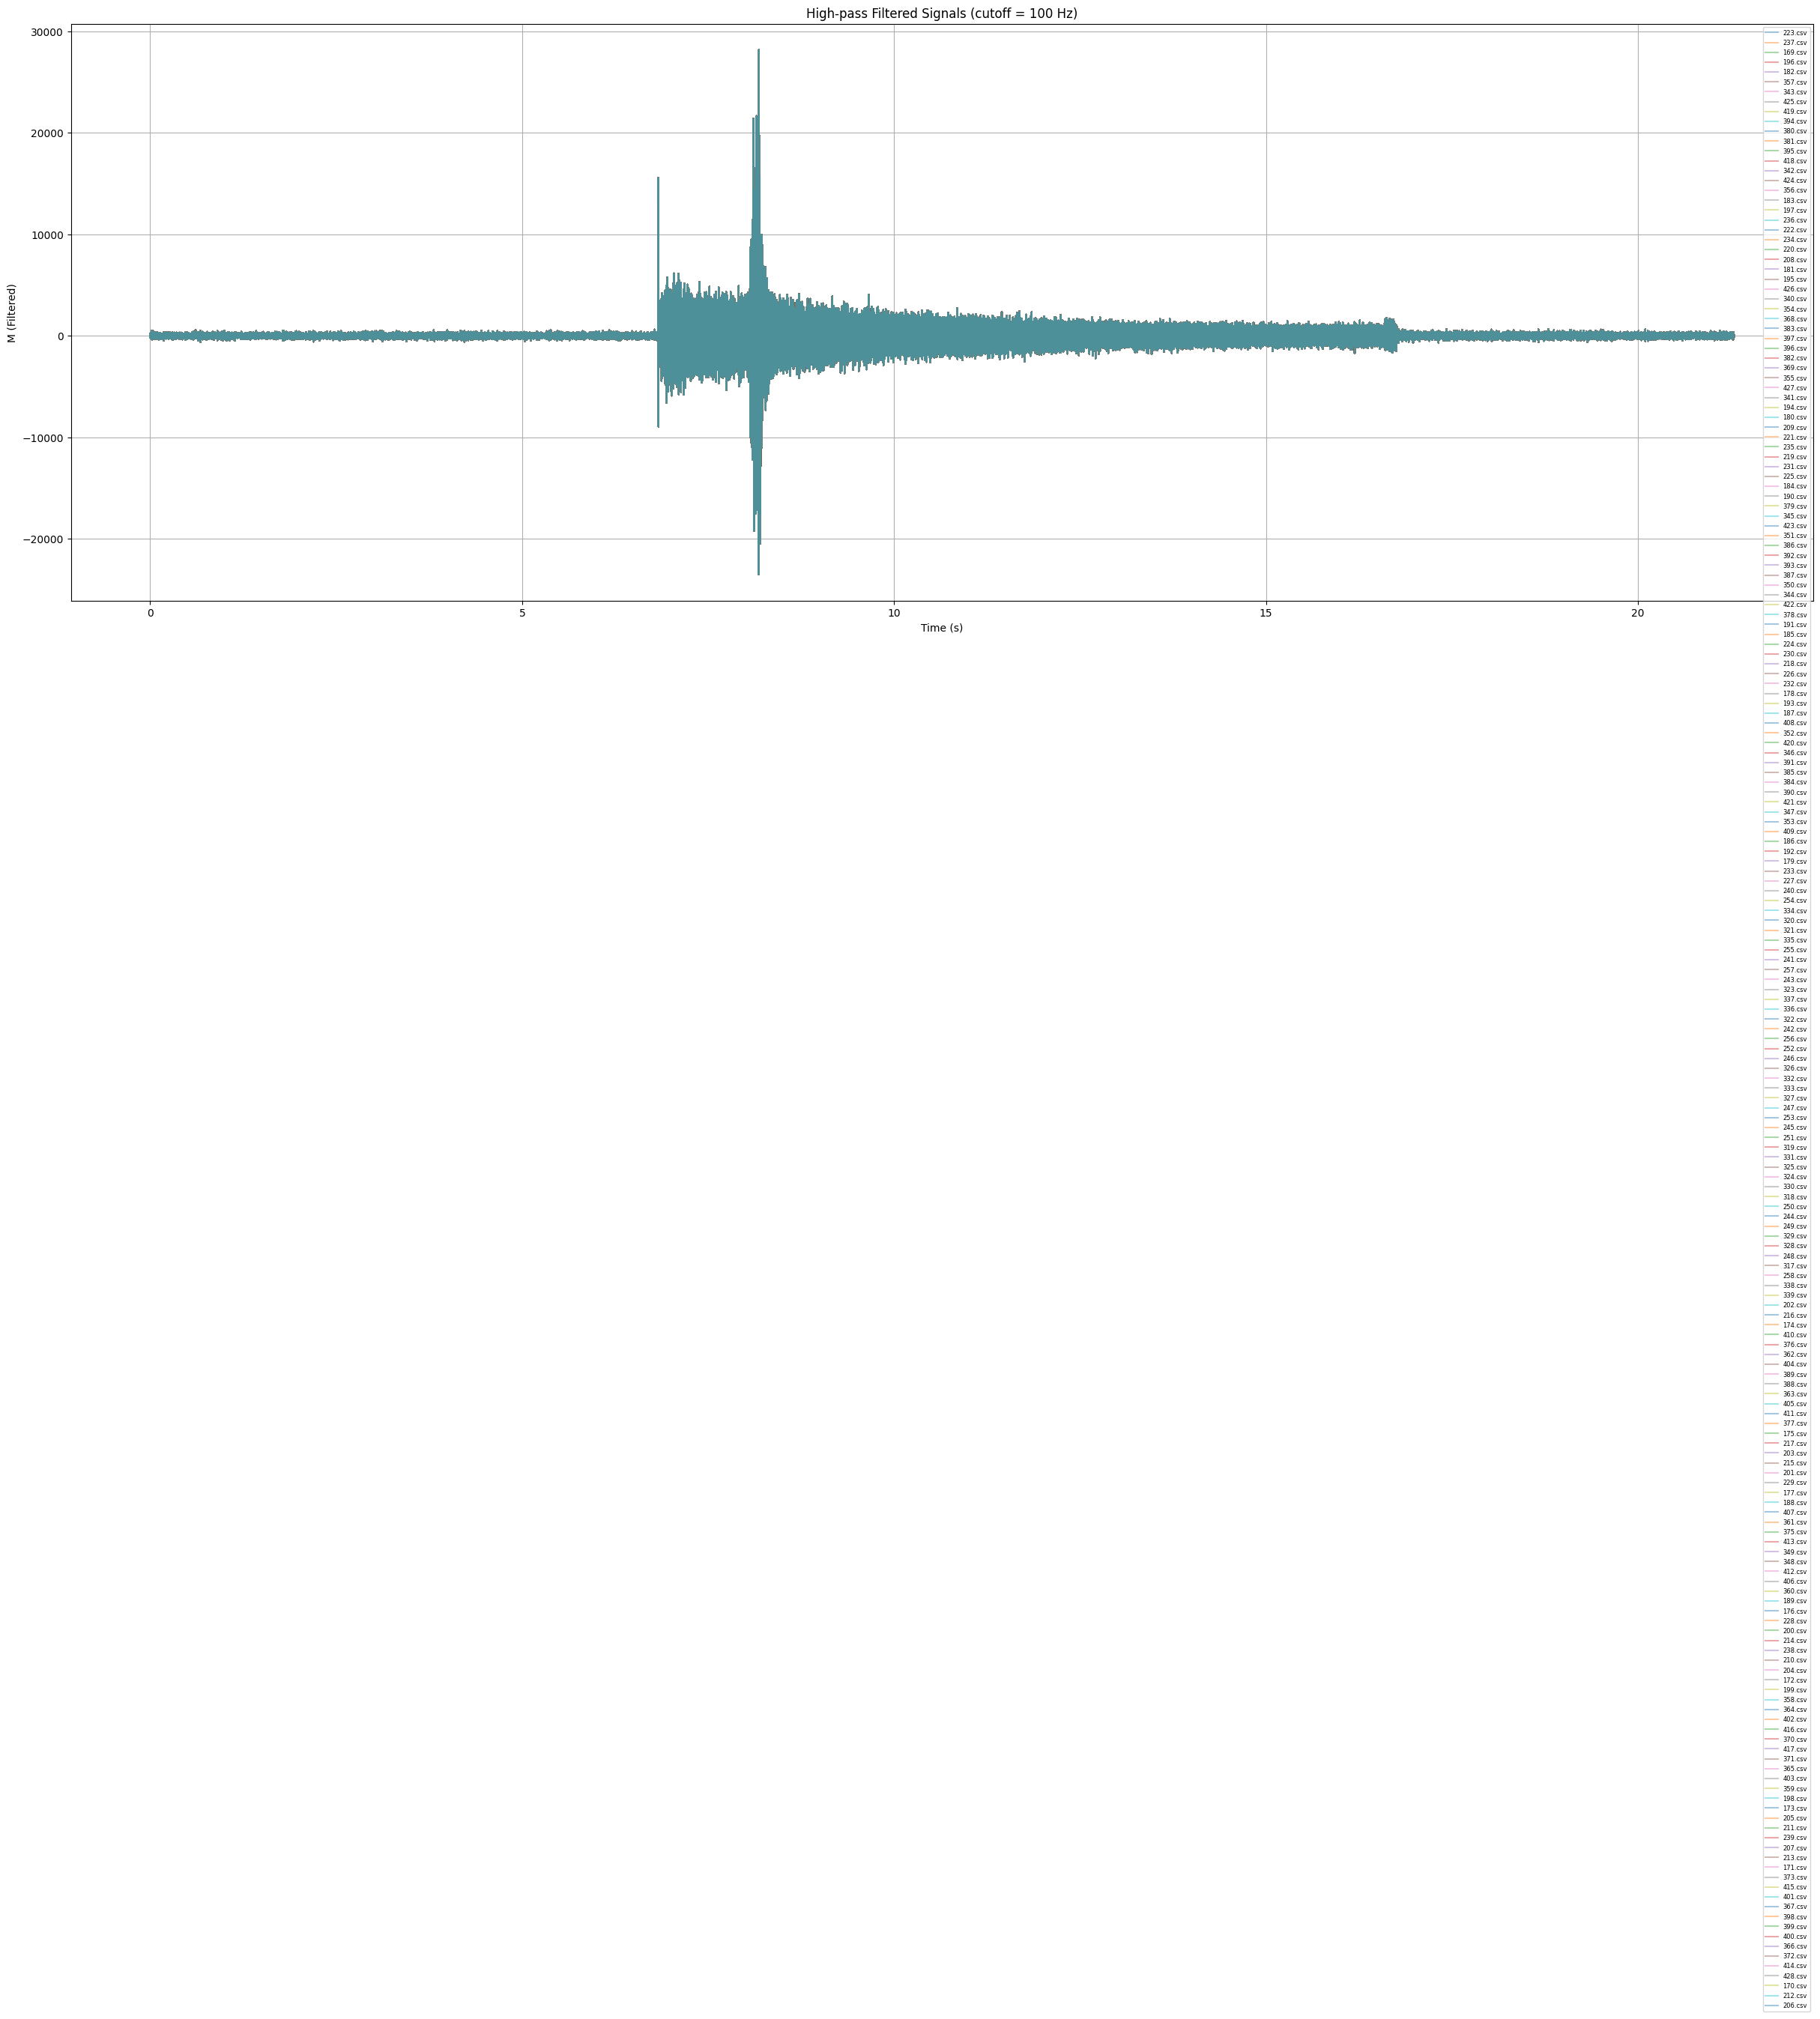

In [25]:
folder_path = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/01_Audio"

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

cutoff = 100  # Cutoff frequency in Hz
order = 3  # Filter order

plt.figure(figsize=(30, 10))

for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)
        print("Processing file:", file_name)

        df = pd.read_csv(file_path)

        if 'Time' not in df.columns or 'M' not in df.columns:
            t = df['Time']
            m = df['M']
        
        fs = 1 / (t[1] - t[0])  # Sampling frequency

        m_filtered = highpass_filter(m, cutoff, fs, order=order)
        
        plt.plot(t, m_filtered, label=file_name, alpha=0.4)

plt.xlabel("Time (s)")
plt.ylabel("M (Filtered)")
plt.title(f"High-pass Filtered Signals (cutoff = {cutoff} Hz)")
plt.legend(fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()

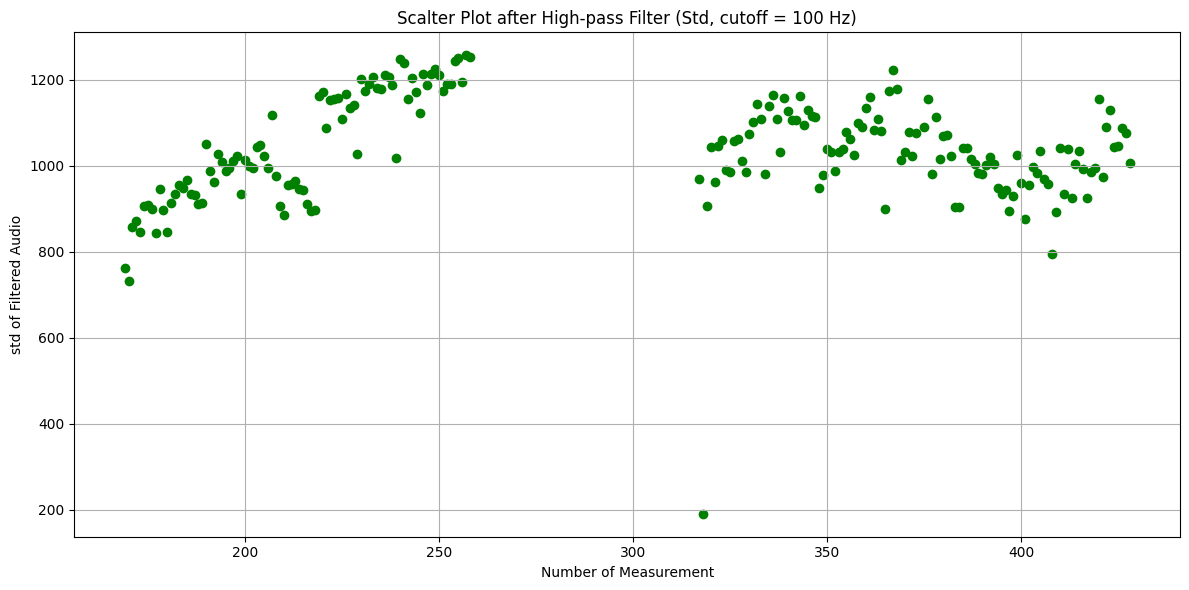

In [ ]:
folder_path = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/01_Audio"  # Path to the folder containing CSV files

def butter_highpass(cutoff, fs, order=5):  #function to create a high-pass Butterworth filter
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)  #filter coefficients
    return b, a

def highpass_filter(data, cutoff, fs, order=5):  #function to apply high-pass filter to the data
    b, a = butter_highpass(cutoff, fs, order=order)  #get filter coefficients
    y = filtfilt(b, a, data)  #Apply zero-phase filtering to avoid phase distortion
    return y

cutoff = 100  # Cutoff frequency in Hz
order = 3  # Filter order

#list to store results
std_list = []
measurement_list = []
label_list = []

#loop over all CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        df = pd.read_csv(file_path)  # Read the CSV file

        t = df['Time']  #time column
        m = df['M']  #measurement column

        fs = 1 / (t[1] - t[0])  # Sampling frequency

        m_filtered = highpass_filter(m, cutoff, fs, order=3)  # Apply the high-pass filter to the signals

        std_value = np.std(m_filtered)  # Calculate the standard deviation of the filtered signal

        measurement_number = int(file_name.split('.')[0])  # Extract measurement number from file name
        
        label = 'io' if std_value > 0 else 'nio'  # Example condition for labeling
        
        # Append results to lists
        std_list.append(std_value)
        measurement_list.append(measurement_number)
        label_list.append(label)

# Create a DataFrame to store the results
result_df = pd.DataFrame({
    'Measurement Number': measurement_list,
    'std': std_list,
    'Label': label_list
})

#create scatter plot
plt.figure(figsize=(12, 6))
for lbl, color in zip(['io', 'nio'], ['green', 'red']):
    subset = result_df[result_df['Label'] == lbl]
    plt.scatter(subset['Measurement Number'], subset['std'], color=color, label=lbl)

plt.xlabel("Number of Measurement")
plt.ylabel("std of Filtered Audio")
plt.grid(True)
plt.title(f"Scalter Plot after High-pass Filter (Std, cutoff = {cutoff} Hz)")
plt.tight_layout()
plt.show()


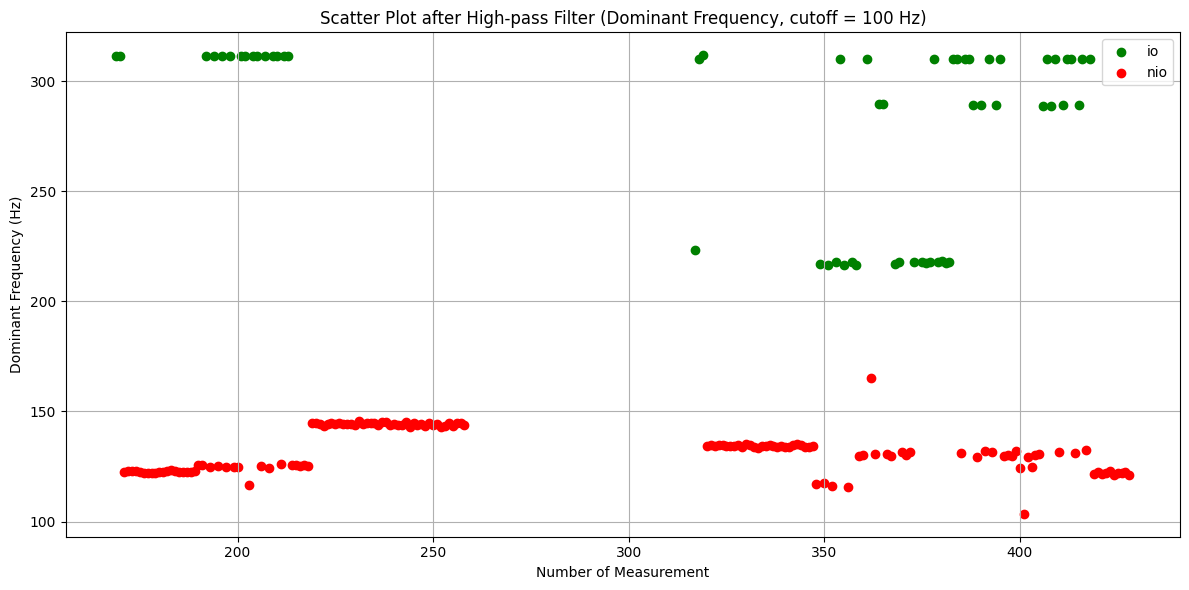

In [ ]:
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq

# Read the CSV files from the specified folder
folder_path = "/Users/macbook/Desktop/TUM/kecheng/KIGp/02_Data/01_Audio"

#function to design a high-pass Butterworth filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq  # Normalize the cutoff frequency
    b, a = butter(order, normal_cutoff, btype='high', analog=False)  #filter coefficients
    return b, a

#function to apply high-pass filter to the data
def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)  #get filter coefficients
    y = filtfilt(b, a, data)  #Apply zero-phase filtering to avoid phase distortion
    return y

cutoff = 100  # Cutoff frequency in Hz
order = 3  # Filter order

freq_list = []  #list to store dominant frequencies
measurement_list = []  #list to store measurement numbers
label_list = []  #list to store labels

threshold_freg = 200  #threshold to label measurements as 'io' or 'nio'

# Loop over all CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(folder_path, file_name)

        df = pd.read_csv(file_path)  # Read the CSV file

        t = df['Time']  #time column
        m = df['M']  #measurement column

        fs = 1 / (t[1] - t[0])  # Sampling frequency

        m_filtered = highpass_filter(m, cutoff, fs, order=order)  # Apply the high-pass filter to the signals

        # Compute FFT
        N = len(m_filtered)  # Number of samples
        yf = fft(m_filtered)  # Perform the Fast Fourier Transform (FFT)
        xf = fftfreq(N, 1 / fs)  #frequency bins

        # Take positive frequencies only
        positive_idxs = xf > 0
        xf = xf[positive_idxs]
        yf = np.abs(yf[positive_idxs])

        # Find dominant frequency
        dom_freq = xf[np.argmax(yf)]

        measurement_number = int(file_name.split('.')[0])  # Extract measurement number from file name
        label = 'io' if dom_freq > threshold_freg else 'nio'  # Example condition for labeling

        freq_list.append(dom_freq)  #store dominant frequency
        measurement_list.append(measurement_number)
        label_list.append(label)

# create a DataFrame to store the results
result_df = pd.DataFrame({
    'Measurement Number': measurement_list,
    'Dominant Frequency': freq_list,
    'Label': label_list
})

# Plot the scatter plot of dominant frequencies
plt.figure(figsize=(12, 6))
for lbl, color in zip(['io', 'nio'], ['green', 'red']):
    subset = result_df[result_df['Label'] == lbl]
    plt.scatter(subset['Measurement Number'], subset['Dominant Frequency'], color=color, label=lbl)

plt.xlabel("Number of Measurement")
plt.ylabel("Dominant Frequency (Hz)")
plt.grid(True)
plt.title(f"Scatter Plot after High-pass Filter (Dominant Frequency, cutoff = {cutoff} Hz)")
plt.legend()
plt.tight_layout()
plt.show()

   Number of Measurement  RMS of Audio Dataset
0                    223   1752.045746      iO
1                    237   1796.774112      iO
2                    169   1485.917267      iO
3                    196   1722.156293     niO
4                    182   1773.298498      iO


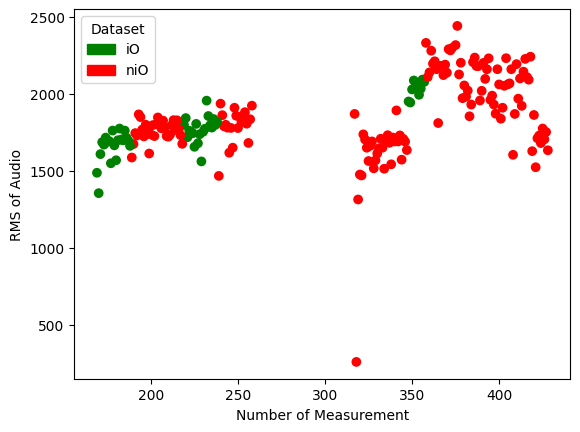

In [22]:
#get RMS of Audio based on M
RMS_list = [np.sqrt((df["M"]**2).mean()) for df in list_Audio]
RMS_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "RMS of Audio": RMS_list
})
#merge RMS with Dataset of excel
Audio_RMS_df = RMS_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_RMS_df.head())

colors = Audio_RMS_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_RMS_df['Number of Measurement'],Audio_RMS_df['RMS of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("RMS of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()


it`s not meaningful, because RMS and std have similar structure, so they have almost same picture.

### Mean of MFCC

   Number of Measurement      MFCC_0     MFCC_3    MFCC_6     MFCC_9 Dataset
0                    223  762.277527  14.627579  7.387307   9.303671      iO
1                    237  763.060364  14.238198  6.918478   9.681822      iO
2                    169  732.911804  18.698122  5.625089  10.439529      iO
3                    196  730.573059  19.486265  7.942286  10.699746     niO
4                    182  736.506226  19.266069  5.989405  11.278272      iO


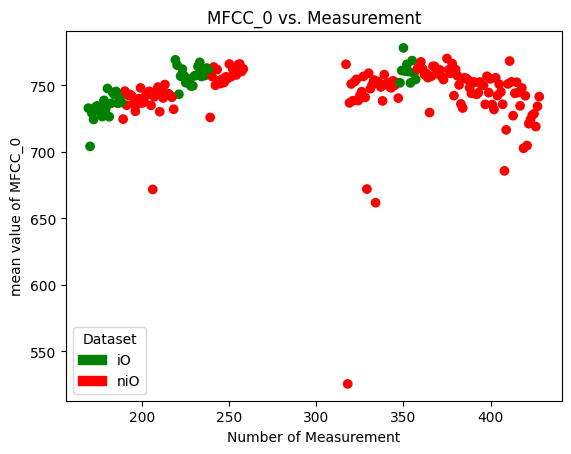

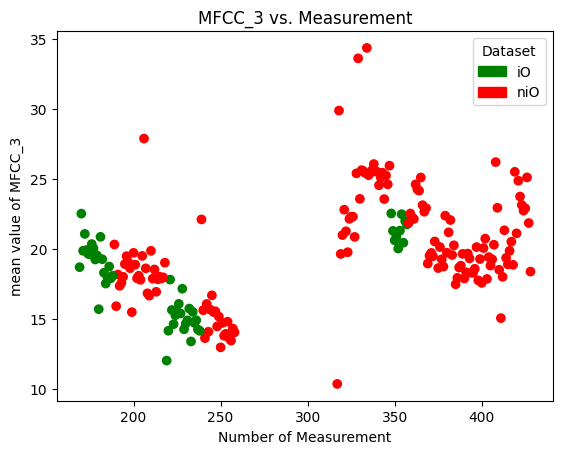

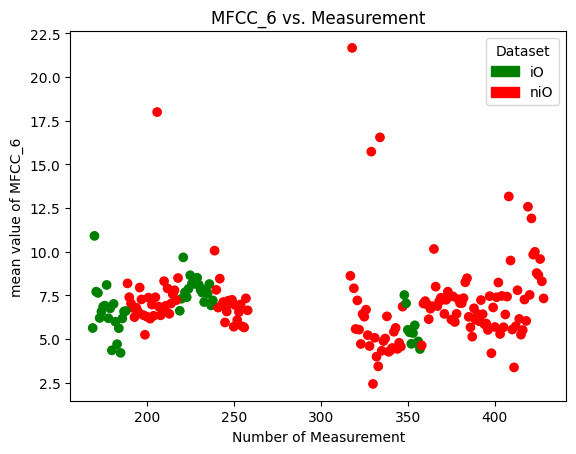

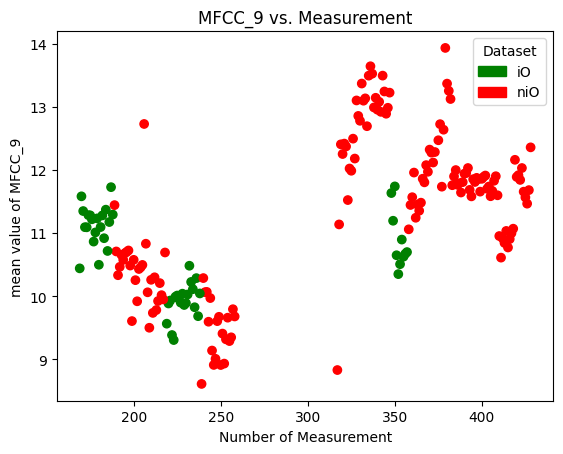

In [23]:
# Assume a sampling rate of 1 kHz
sr = 1000 
# compute mfccs
mfcc_0, mfcc_3, mfcc_6, mfcc_9 = [], [], [], []
for df in list_Audio:
    mfccs_audio = librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=13)
    mfcc_0.append(np.mean(mfccs_audio[0]))
    mfcc_3.append(np.mean(mfccs_audio[3]))
    mfcc_6.append(np.mean(mfccs_audio[6]))
    mfcc_9.append(np.mean(mfccs_audio[9]))       


MFSS_list = [librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=13) for df in list_Audio]
MFSS_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "MFCC_0": mfcc_0,
    "MFCC_3": mfcc_3,
    "MFCC_6": mfcc_6,
    "MFCC_9": mfcc_9
})
#merge MFSS with Dataset of excel
Audio_MFSS_df = MFSS_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_MFSS_df.head())

for MFCC in ['MFCC_0', 'MFCC_3', 'MFCC_6', 'MFCC_9']:
    colors = Audio_MFSS_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
    plt.scatter(Audio_MFSS_df['Number of Measurement'],Audio_MFSS_df[MFCC],c=colors)
    plt.xlabel("Number of Measurement")
    plt.ylabel(f"mean value of {MFCC}")
    plt.title(f"{MFCC} vs. Measurement")
    legend_handles = [
        mpatches.Patch(color='green', label='iO'),
        mpatches.Patch(color='red', label='niO')
    ]
    plt.legend(handles=legend_handles, title="Dataset")
    plt.show()




### Duration time of weld process

   Number of Measurement  Duration of Audio Dataset
0                    223           7.562667      iO
1                    237           7.200000      iO
2                    169           9.941333      iO
3                    196           6.816000     niO
4                    182           6.613333      iO


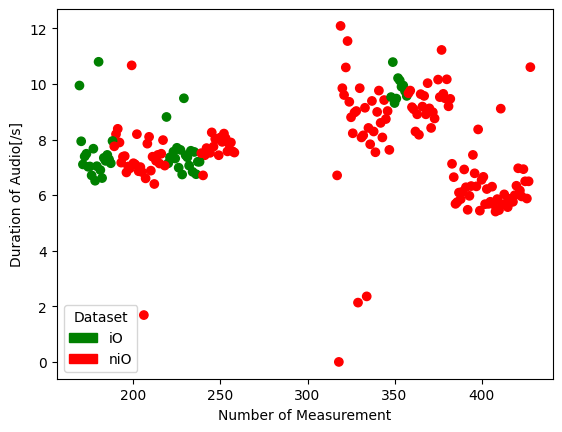

In [24]:
# compute duration time of weld process based on MFCC[0]
sr=48000
Duration = []
for df in list_Audio:
    mfccs_audio = librosa.feature.mfcc(y=df["M"].values.astype(np.float32), sr=sr, n_mfcc=13)
    duration = get_mfcc0_duration_over_threshold(mfccs_audio, 700, sr=sr)
    Duration.append(duration)

Duration_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "Duration of Audio": Duration
})
#merge uration with Dataset of excel
Audio_Duration_df_df = Duration_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_Duration_df_df.head())

colors = Audio_Duration_df_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_Duration_df_df['Number of Measurement'],Audio_Duration_df_df['Duration of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("Duration of Audio[/s]")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()

### FFT of all data


In [25]:
"""
not finish  i`m tired
"""
peak_freq_list = []
for df in list_Audio:
    Y = np.fft.fft(df["M"])
    sr = 10
    frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
    Y_half = np.abs(Y[:len(Y)//2])
    freqs_half = frequencies[:len(frequencies)//2]

high_freq_energy = half_Y[half_freq > 5000].sum()

#get FFT of Audio based on M
FFT_list = [np.sqrt((df["M"]**2).mean()) for df in list_Audio]
FFT_df = pd.DataFrame({
    "Number of Measurement": id_Audio,
    "RMS of Audio": RMS_list
})
#merge RMS with Dataset of excel
Audio_RMS_df = RMS_df.merge(df_Usage, on="Number of Measurement", how="left")
print(Audio_RMS_df.head())

colors = Audio_RMS_df['Dataset'].map({'iO': 'green', 'niO': 'red'})
plt.scatter(Audio_RMS_df['Number of Measurement'],Audio_RMS_df['RMS of Audio'],c=colors)
plt.xlabel("Number of Measurement")
plt.ylabel("RMS of Audio")
legend_handles = [
    mpatches.Patch(color='green', label='iO'),
    mpatches.Patch(color='red', label='niO')
]
plt.legend(handles=legend_handles, title="Dataset")
plt.show()

# FFT
# Perform the Fast Fourier Transform (FFT) on the audio signal in column "M"
Y = np.fft.fft(df["M"])
# Compute the frequency bins corresponding to the FFT result
sr = 10
frequencies = np.fft.fftfreq(len(df["M"]), d=1/sr)
# Plot the magnitude spectrum (only the positive half of frequencies and amplitudes)
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y)[:len(Y)//2])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of Audio Signal")
plt.grid(True)
plt.show()

NameError: name 'half_Y' is not defined

In [ ]:
# read 10 first audio file
for i in range (0,10):
    plt.figure(i)
    x = list_Audio[i]["Time"]
    y = list_Audio[i]["M"]
    plt.plot(x,y)
    plt.xlabel("Time (s)")
    plt.ylabel("M ")
    plt.title("Audio data from measurement" + str(i+1))


### Weldqas part

# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
print(df)
df.info()
x = df["Time"]
y = df["M"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("M ")


      Time [s]  Current [A]  Voltage [V]  Wire [m/min]
0     0.000000         11.7         0.83           0.0
1     0.000043         12.7         0.68           0.0
2     0.000085         13.2         0.68           0.0
3     0.000128         15.6         0.54           0.0
4     0.000170         15.2         0.00           0.0
...        ...          ...          ...           ...
4696  0.199583         18.1         0.00           0.0
4697  0.199626         16.1        -0.54           0.0
4698  0.199668         14.2        -0.54           0.0
4699  0.199711         12.7        -0.54           0.0
4700  0.199754         11.2        -0.54           0.0

[4701 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701 entries, 0 to 4700
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time [s]      4701 non-null   float64
 1   Current [A]   4701 non-null   float64
 2   Voltage [V]   4701 non-null   fl

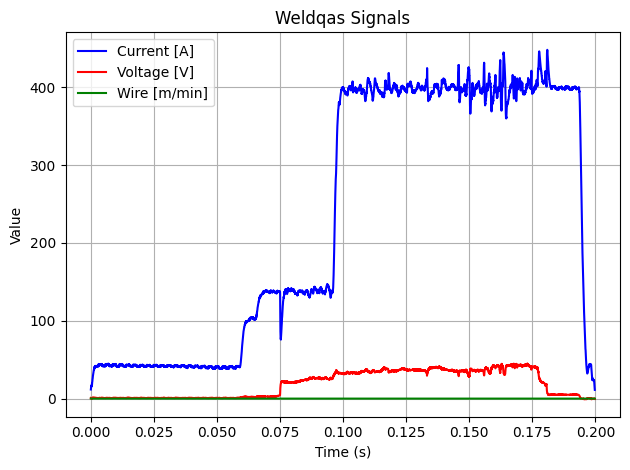

In [26]:
# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')
print(df)
df.info()
"""
plt.figure(1)
x = df["Time [s]"]
y = df["Current [A]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.figure(2)
x = df["Time [s]"]
y = df["Voltage [V]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.figure(3)
x = df["Time [s]"]
y = df["Wire [m/min]"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("Wire (m/min)")
"""
plt.plot(df["Time [s]"], df["Current [A]"], label="Current [A]", color="blue")
plt.plot(df["Time [s]"], df["Voltage [V]"], label="Voltage [V]", color="red")
plt.plot(df["Time [s]"], df["Wire [m/min]"], label="Wire [m/min]", color="green")

plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.title("Weldqas Signals")
plt.legend()  
plt.grid(True)
plt.tight_layout()
plt.show()


